# Train your first classification tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Loading data

breast_cancer_df = pd.read_csv('/home/pitu/Documents/jupyter/data/breast_cancer/data.csv')
breast_cancer_df['diagnosis_bin'] = breast_cancer_df['diagnosis'].apply(lambda x : 1 if x == "M" else 0)

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df[['radius_mean','concave points_mean']], breast_cancer_df['diagnosis_bin'],test_size=0.2)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
print(dt.score(X_test,y_test))


[0 1 0 1 0]
0.8947368421052632


# Evaluate Classification Tree


In [2]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
    """Plot decision regions of a classifier.

    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    res : float or array-like, shape = (2,) (default: 0.02)
        Grid width. If float, same resolution is used for both the x- and
        y-axis. If array-like, the first item is used on the x-axis, the
        second is used on the y-axis. Lower values increase the resolution but
        slow down the plotting.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default 's^oxv<>')
        Scatterplot markers.
    colors : str (default 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    """

    #check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    if isinstance(res, float):
        xres, yres = res, res
    else:
        try:
            xres, yres = res
        except ValueError:
            raise ValueError('Unable to unpack res. Expecting '
                             'array-like input of length 2.')

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError('X_highlight must be a NumPy array or None')
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError('X_highlight must be a 2D array')

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError(
                'feature_index requires more than one training feature')
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                'Unable to unpack feature_index. Make sure feature_index '
                'only has two dimensions.')
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                'feature_index values out of range. X.shape is {}, but '
                'feature_index is {}'.format(X.shape, feature_index))
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError('Filler values must be provided when '
                             'X has more than 2 training features.')

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    'filler_feature_values and filler_feature_ranges must '
                    'have the same keys')

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                'Column(s) {} need to be accounted for in either '
                'feature_index or filler_feature_values'.format(missing_cols))

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                         np.arange(y_min, y_max, yres))

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict)
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    ax.contourf(xx, yy, Z,
                alpha=0.3,
                colors=colors,
                levels=np.arange(Z.max() + 2) - 0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    # Scatter training data samples
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                            X, filler_feature_values=filler_feature_values,
                            filler_feature_ranges=filler_feature_ranges)
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(x=x_data,
                   y=y_data,
                   alpha=0.8,
                   c=colors[idx],
                   marker=next(marker_gen),
                   edgecolor='black',
                   label=c)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,
                      framealpha=0.3, scatterpoints=1, loc=legend)

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                    X_highlight, filler_feature_values=filler_feature_values,
                    filler_feature_ranges=filler_feature_ranges)
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        ax.scatter(x_data,
                   y_data,
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=80)

    return ax

def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

# Logistic regression vs classification tree

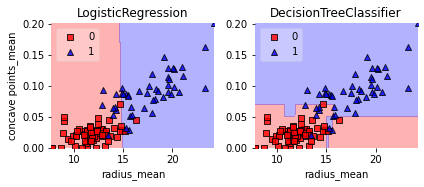

In [4]:

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

# Entropy vs Gini index

In [5]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred_entropy, y_test)
accuracy_gini = accuracy_score(y_pred_gini, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9210526315789473


# Train your first regression tree

In [6]:
import numpy as np
auto_mpg = pd.read_csv('/home/pitu/Documents/jupyter/data/auto_mpg/auto-mpg.csv')
print(auto_mpg.head())
# Convert '?' to NaN
auto_mpg[auto_mpg == '?'] = np.nan
auto_mpg.dropna(inplace=True)
auto_mpg.drop('car name',axis =1,inplace=True)
X = auto_mpg.drop(['mpg'],axis =1)
y = auto_mpg['mpg']


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
 
from sklearn.model_selection import train_test_split
# Import DecisionTreeRegressor from sklearn.tree

from sklearn.tree import DecisionTreeRegressor
# Load auto_mpg dataset


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# Instantiate dt
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=3)

parameters = {'max_depth' : list(range(1,10)),'min_samples_leaf' : [x / 100 for x in list(range(1,100))], 'random_state' : range(1,10)}

searcher = GridSearchCV(dt, parameters,n_jobs=-1)
searcher.fit(X_train,y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

dt = DecisionTreeRegressor(max_depth=5,
             min_samples_leaf=0.02,
            random_state=2)

# Fit dt to the training set
dt.fit(X_train, y_train)

Best CV params {'max_depth': 5, 'min_samples_leaf': 0.02, 'random_state': 2}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.02, random_state=2)

## Evaluate the regression tree

In [8]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 2.80


## Linear regression vs regression tree

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train,y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_pred_lr, y_test)

# Compute rmse_lr
rmse_lr = np.sqrt(mse_lr)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.27
Regression Tree test set RMSE: 2.80


# Diagnose the bias and variance problems of a regression tree
* CV MSE Error > training error     => High Variance => Overfit 
* CV MSE Error aprox training error => high bias => Underfit 


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = np.sqrt(MSE_CV_scores.mean())

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = np.sqrt(MSE(y_train,y_pred))

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

CV RMSE: 4.30
Train RMSE: 4.19


# Define the ensemble


### Getting the data

In [90]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

indian_liver = pd.read_csv('/home/pitu/Documents/jupyter/data/indian_liver/Indian Liver Patient Dataset (ILPD).csv')

# Convert '?' to NaN
indian_liver[indian_liver == '?'] = np.nan
indian_liver.dropna(inplace=True)


lb_make = LabelEncoder()
indian_liver['gender_cat'] = lb_make.fit_transform(indian_liver['gender'])

ss_make = StandardScaler()

X = ss_make.fit_transform(indian_liver.drop(['is_patient','gender'],axis =1))
y = indian_liver['is_patient']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X[0])


[ 1.24740264 -0.42031984 -0.49541415 -0.42887006 -0.35583241 -0.31911128
  0.29372174  0.20344649 -0.14738974 -1.77079482]


### Defining the ensemble

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbours : 0.718
Classification Tree : 0.730


### Better performance with a Voting Classifier


In [13]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.759


## Define the bagging classifier

In [14]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8,random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1,n_jobs=-1,oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy of bc: 0.71
OOB accuracy: 0.676


### OOB Score vs Test Set Score

In [15]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_
# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.707, OOB accuracy: 0.676


# Random Forest

## Train an RF regressor
https://www.kaggle.com/erengugu/bike-rent-visualization-eda


In [58]:
import pandas as pd


train = pd.read_csv('/home/pitu/Documents/jupyter/data/bike_sharing_demand/train.csv')
X_test = pd.read_csv('/home/pitu/Documents/jupyter/data/bike_sharing_demand/test.csv')



## Getting dummies for feature enhacement

### Per Season

In [59]:
# Separating seasons per values
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
season=pd.get_dummies(X_test['season'],prefix='season')
X_test=pd.concat([X_test,season],axis=1)
X_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


### Weather


In [60]:
weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)
weather=pd.get_dummies(X_test['weather'],prefix='weather')
X_test=pd.concat([X_test,weather],axis=1)
X_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


## Dropping unnecessary features

In [61]:
train.drop(['season','weather','registered','casual'],inplace=True,axis=1) # Registered and casual are not in testing set
train.head()
X_test.drop(['season','weather'],inplace=True,axis=1)
X_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


## Splitting datetime

In [62]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})

X_test["hour"] = [t.hour for t in pd.DatetimeIndex(X_test.datetime)]
X_test["day"] = [t.dayofweek for t in pd.DatetimeIndex(X_test.datetime)]
X_test["month"] = [t.month for t in pd.DatetimeIndex(X_test.datetime)]
X_test['year'] = [t.year for t in pd.DatetimeIndex(X_test.datetime)]
X_test['year'] = X_test['year'].map({2011:0, 2012:1})
X_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [63]:
train.drop('datetime',axis=1,inplace=True)
X_test.drop('datetime',axis=1,inplace=True)
X_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [64]:


y_train = train['count']
train.drop('count',axis=1,inplace=True)


In [65]:
len(X_test)/len(train)

0.5964541613081021

## Train an RF regressor

In [69]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(train,y_train,test_size=0.20,random_state=42) 

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

## Evaluate the RF regressor

In [25]:
import numpy as np 
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE, mean_squared_log_error

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = np.sqrt(MSE(y_test,y_pred))
log_test = np.sqrt(mean_squared_log_error(y_pred,y_test))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Test set LRMSE of rf: {:.2f}'.format(log_test))

Test set RMSE of rf: 39.90
Test set LRMSE of rf: 0.33


## Visualizing features importances

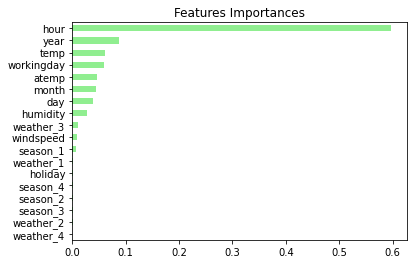

In [26]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# AdaBoost


In [27]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

indian_liver = pd.read_csv('/home/pitu/Documents/jupyter/data/indian_liver/Indian Liver Patient Dataset (ILPD).csv')

# Convert '?' to NaN
indian_liver[indian_liver == '?'] = np.nan
indian_liver.dropna(inplace=True)


lb_make = LabelEncoder()
indian_liver['gender_cat'] = lb_make.fit_transform(indian_liver['gender'])

ss_make = StandardScaler()

X = ss_make.fit_transform(indian_liver.drop(['is_patient','gender'],axis =1))
y = indian_liver['is_patient']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# The classes are heavily skewed we need to solve this issue later.
print('Suffers from desease', round(indian_liver['is_patient'].value_counts()[1]/len(indian_liver) * 100,2), '% of the dataset')
print('healty', round(indian_liver['is_patient'].value_counts()[2]/len(indian_liver) * 100,2), '% of the dataset')

Suffers from desease 71.5 % of the dataset
healty 28.5 % of the dataset


In [28]:
indian_liver['is_patient'].value_counts()

1    414
2    165
Name: is_patient, dtype: int64

Dataset is imbalanced, should do somtehing about it -> given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.


In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]


# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.72


# Gradient Boosting


In [43]:
# Using the bike sharing demand
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=200, max_depth=4, random_state=2)
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = gbt.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
#rmse_log_test = mean_squared_log_error(y_pred,y_test)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
#print('Test set RMSLE: {:.2f}'.format(rmse_log_test))

Test set RMSE: 46.77


# Stochastic Gradient Boosting (sgbt)

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

sgbt = GradientBoostingRegressor(max_depth=8,subsample=0.7,max_features=0.9,n_estimators=150,random_state=2)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 35.39


In [87]:
#for random forest regresion.
from sklearn.model_selection import KFold
no_of_test=[500]
params_dict={'n_estimators':[150],'max_depth':[8],'subsample' : [0.7],'max_features' : [(i+1)/10 for i in range(9)]}
#kfold = KFold(n_splits=2, shuffle=True, random_state=0)
clf_rf=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params_dict,scoring='neg_mean_absolute_error',n_jobs=-1 ,cv=10)
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(MSE(pred,y_test))))
print(clf_rf.best_params_)
print(clf_rf.best_score_)

35.776253211241645
{'max_depth': 8, 'max_features': 0.9, 'n_estimators': 150, 'subsample': 0.7}
-23.193783906504585


# Tree hyperparameters

In [93]:
#Indian liver dataset

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [94]:
# Define params_dt
params_dt = {
             'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
            }

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train,y_train)
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.707
